# Fruit prediction by using its attributes

In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
file = 'D:\Fruits.csv'

In [18]:
df = pd.read_csv(file)

In [19]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [20]:
df.head(3)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60


In [21]:
print(df.shape)

(59, 7)


In [22]:
print(df['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [23]:
print(df.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


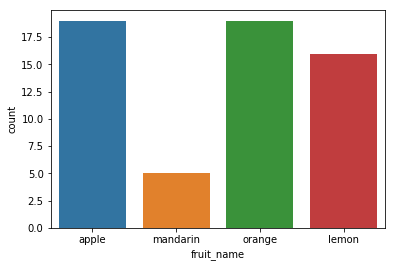

In [24]:
import seaborn as sns
sns.countplot(df['fruit_name'], label="Count")
plt.show()

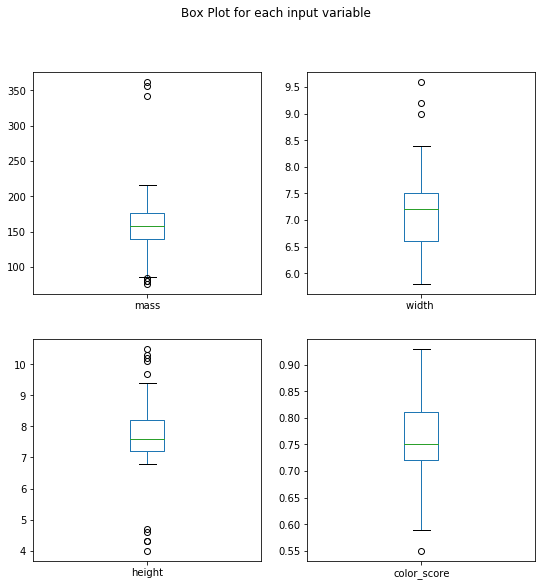

In [25]:
df.drop('fruit_label', axis=1).plot(kind='box', subplots=True,
layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                          title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

It looks like perhaps color_score has a near Gaussian distribution.

In [26]:
import pylab as pl

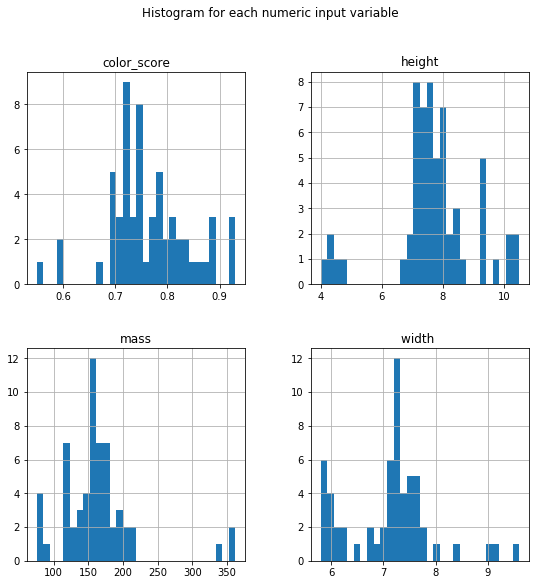

In [27]:
df.drop('fruit_label', axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

In [28]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

C:\Users\Baba\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


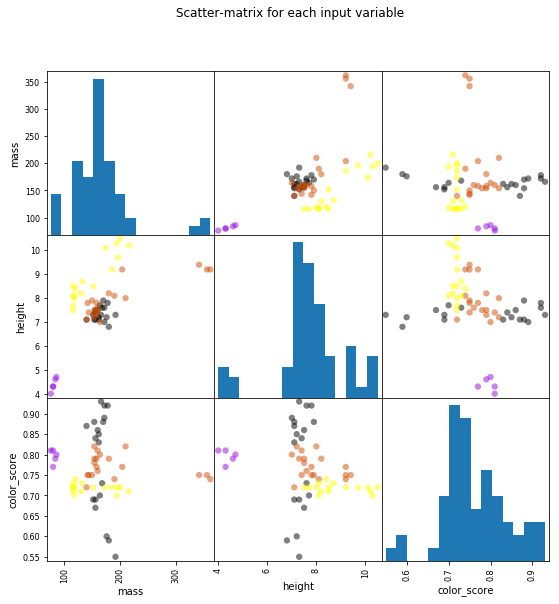

In [39]:
feature_names = (['mass','height','color_score'])
X = df[feature_names]
y = df['fruit_label']

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s= 40, hist_kwds ={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

In [40]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


# Create Training and Test Sets and Apply Scaling

In [41]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Models

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.59
Accuracy of Logistic regression classifier on test set: 0.40


# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.59
Accuracy of Decision Tree classifier on test set: 0.40


# K-Nearest Neigbors

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.87


It is the better prediction than above two algorithms

# Gaussian Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.93
Accuracy of GNB classifier on test set: 0.87


This algorithm also predicts better

In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[4 0 0 0]
 [0 1 0 0]
 [2 0 6 0]
 [0 0 0 2]]
             precision    recall  f1-score   support

          1       0.67      1.00      0.80         4
          2       1.00      1.00      1.00         1
          3       1.00      0.75      0.86         8
          4       1.00      1.00      1.00         2

avg / total       0.91      0.87      0.87        15

